 Importing the dependencies


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Importing the Boston Housing Price Dataset

In [6]:
from google.colab import files

uploaded = files.upload()


Saving boston.csv to boston.csv


In [7]:
import os

print(os.listdir())

['.config', 'boston.csv', 'sample_data']


In [8]:
house_price_dataset = pd.read_csv("boston.csv")

In [9]:
print(house_price_dataset)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [13]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [16]:
X = house_price_dataframe.drop(columns=['MEDV'])

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [18]:
y = house_price_dataframe['MEDV']

In [19]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
##checking the missing values
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [22]:
#statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


correlation of the dataset

In [23]:
correlation = house_price_dataframe.corr()

<Axes: >

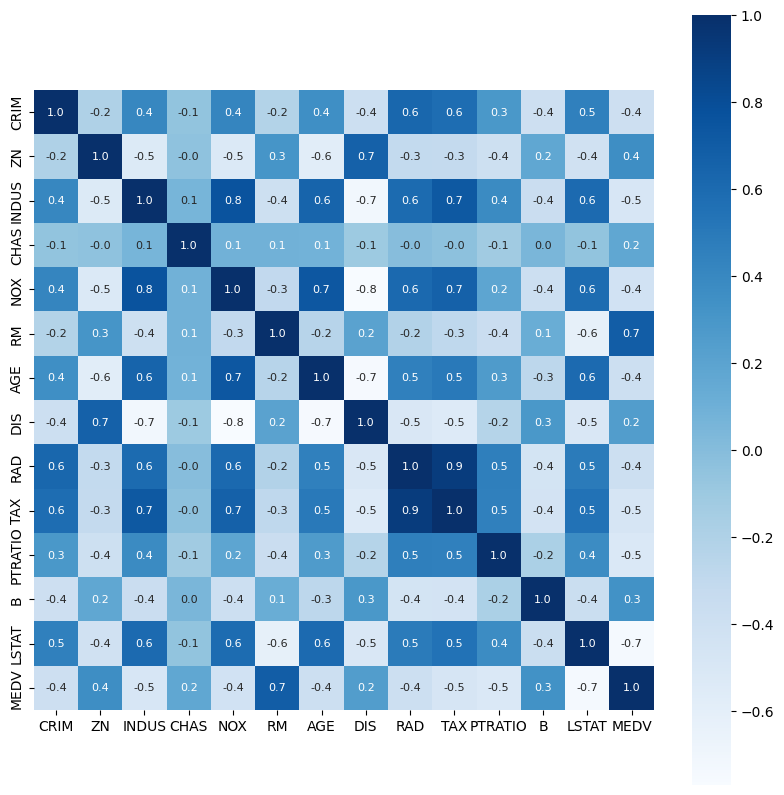

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

spliting the dataframe for training and testing

In [25]:
X = house_price_dataframe.drop(columns=['MEDV'])

In [26]:
y = house_price_dataframe['MEDV']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


Model Training
XgBoost Regressor

In [29]:
#load the model
model = XGBRegressor()

In [30]:
# training the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation




In [31]:
pred_data = model.predict(X_train)

In [33]:
# R squared_error
score_1 = metrics.r2_score(Y_train, pred_data)

# Mean absolute error

score_2 = metrics.mean_absolute_error(Y_train, pred_data)

print('R squared_error', score_1)
print('Mean absolute error', score_2)

R squared_error 0.9999980039471451
Mean absolute error 0.0091330346494618


Visualizing the actual price and predicted price

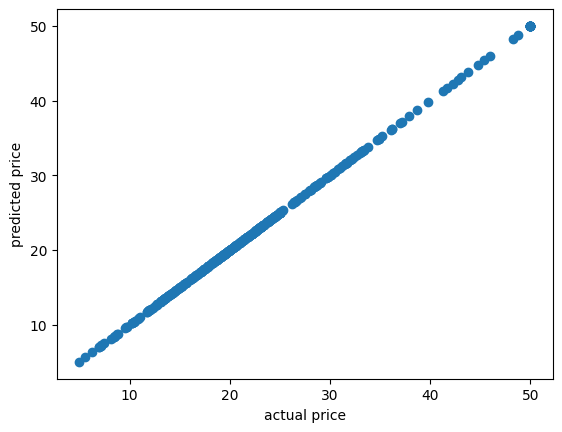

In [36]:
plt.scatter(Y_train, pred_data)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()

prediction for test data

In [34]:
test_pred = model.predict(X_test)

In [35]:
# R squared_error
score_1 = metrics.r2_score(Y_test, test_pred)

# Mean absolute error

score_2 = metrics.mean_absolute_error(Y_test, test_pred)

print('R squared_error', score_1)
print('Mean absolute error', score_2)

R squared_error 0.9051721149855378
Mean absolute error 2.0748727686264927


visualizing on the test data

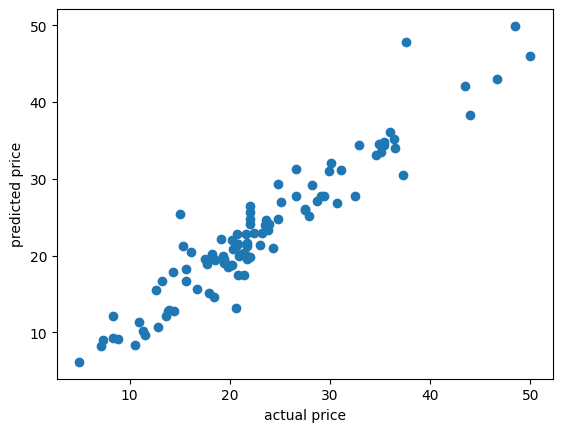

In [37]:
plt.scatter(Y_test, test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()